In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind

In [2]:
shg=pd.read_csv('D:\\ANALYTICS\\GREAT LEARNING\\7.Statistical Method for Decisoin Making-Week-4\\A & B shingles-1.csv')

# Problem 3
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet. 
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.


In [3]:
shg.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [4]:
shg.tail(n=10)

,A,B
26,0.49,0.16
27,0.34,0.52
28,0.36,0.36
29,0.29,0.22
30,0.27,0.39
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


In [5]:
shg.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [8]:
#3.1. For the A shingles, form the null and alternative hypothesis to test whether the 
#population mean moisture content is less than 0.35 pound per 100 square feet.


A.H0(Null Hypothesis)=> Population mean=0.35 pound per 100 square feet,

Ha(Alternate Hypothesis=>Population mean < 0.35 pound per 100 square feet

In [7]:
#3.2. For the A shingles, conduct the test of hypothesis and find the p-value. Interpret the p-value. 
#Is there evidence at the 0.05 level of significance that the population mean moisture 
#content is less than 0.35 pound per 100 square feet?
t_stat,p_val=ttest_1samp(shg['A'],0.35)
print('Statistic :',t_stat)
print('P-Value :',p_val)

Statistic : -1.4735046253382782
P-Value : 0.14955266289815025


At .05 significance level there is no clear evidence to reject the null hypothesis

Here we fail to reject the null hypothesis since P-val(0.14)>alpha-val(0.05)

In [9]:
#3.3. For the B shingles, form the null and alternative hypothesis to test 
#whether the population mean moisture content is less than 0.35 pound per 100 square feet.

A. H0(Null Hypothesis)= Population mean = 0.35 pound per 100 square feet,

Ha(Alternate Hypothesis)= Population mean < 0.35 pound per 100 square feet

In [14]:
#3.4. For the B shingles, conduct the test of the hypothesis and find the p-value. Interpret the p-value. 
#Is there evidence at the 0.05 level of significance that the population mean moisture
#content is less than 0.35 pound per 100 square feet?
t_stats,p_value=ttest_1samp(shg['B'][:31],0.35)
print('Statistic :',t_stats)
print('P-Value :',p_value)

Statistic : -3.1003313069986995
P-Value : 0.004180954800638363


We reject the null hypothesis at 0.05 significance level since P-val(0.004)<Alpha_val(.05)

In [15]:
#3.5. Do you think that the population means for shingles A and B are equal? 
#Form the hypothesis and conduct the test of the hypothesis.
#What assumption do you need to check before the test for equality of means is performed?

A.H0(Null Hypothesis)=>Mean of A equal to Mean of B

Ha(Alternate Hypothesis)=>Mean of A not equal to Mean of B

Since we are comparing 2 samples for equality of variance we assume equal variance 

In [16]:
t_2samp,p_val_2samp=ttest_ind(shg['A'],shg['B'][:31])
print('Statistic :',t_2samp)
print('P-Value :',p_val_2samp)

Statistic : 1.289628271966112
P-Value : 0.2017496571835328


There is no evidence at 0.05 significance level to reject the null hypothesis,here we fail to 

reject the null hypothesis

In [17]:
#3.6. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

1.Sample data is a representative of population data and hypothesis made on sample data

2.Sample data taken is significantly larger so that it will follow normal distribution(bell-curve)

3.While testing 2 samples from same population for comparing means equal variance is assumed

In [23]:
#3.7 Check the assumptions made with histograms, boxplots, normal probability plots or empirical rule
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

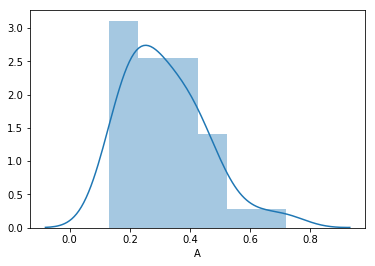

In [24]:
sns.distplot(shg['A'])

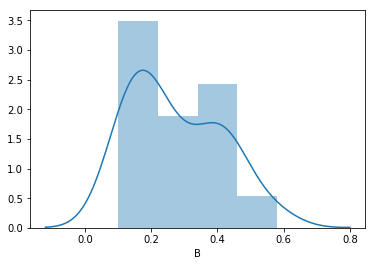

In [25]:
sns.distplot((shg['B'][:31]))

From above we could see there is slight distortion in bell-shaped curve it is not perfectly normally distributed.

If we are able to add more samples for testing curve will approximate to bell-curve

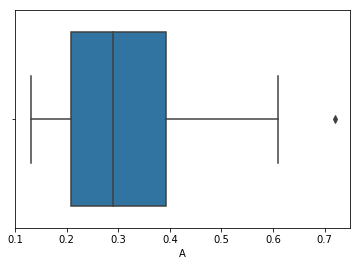

In [26]:
sns.boxplot(shg['A'],orient='h')

We could see an outlier which which makes the bell curve skewed and distorted 

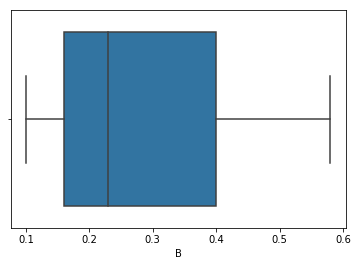

In [27]:
sns.boxplot(shg['B'][:31])

We could see for shingles B Median is towards left that is positively skewed

In [31]:
#Empirical rule
mean_A=shg['A'].mean()
std_A=shg['A'].std()
mean_1std_right=mean_A+std_A
mean_1std_left=mean_A-std_A
cnt=((shg['A'] < mean_1std_right) & (shg['A'] > mean_1std_left)).sum()
pect=cnt/36

In [32]:
pect

0.7222222222222222

Empirical rule defines 68 percent of data lies between 1 standard deviation away from mean

but shingles A has 72 percentage of data between 1 standard deviation away from mean

In [33]:
mean_B=shg['B'][:31].mean()
std_B=shg['B'][:31].std()
mean_1std_right=mean_B+std_B
mean_1std_left=mean_B-std_B
cnt=((shg['B'][:31] < mean_1std_right) & (shg['B'][:31] > mean_1std_left)).sum()
pect=cnt/36

In [34]:
pect

0.5277777777777778

We could see whil Shingles B only contains only 52 percentage of data within 1 standard deviation away from mean

which fails the empirical rule 

In [35]:
#3.8. Do you think that the assumption needed in order to conduct the hypothesis tests above is valid? Explain

Shingles A has 36 samples and  Shinlges B has 31 samples, given the population mean and no population standard deviation

it is safe to assume T-test for the samples. 30 samples is enough to assume that the sample data is large enough to follow

normal distribution, given the sample size of 31 and 36 it is safe to assume it follows normal distribution.